# Algoritmo Hierárquico

Gabriel Oliveira Ramos do Nascimento -  RA 21022939
Matheus de Mello Santos Oliveira - RA 21396705

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

dados_csv = pd.read_csv('https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
dados_csv

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


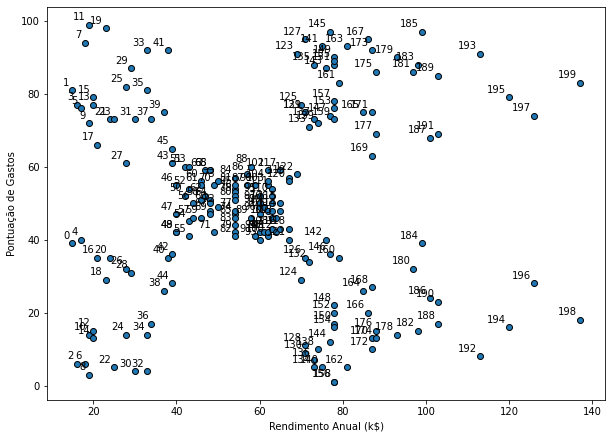

In [2]:
dados = dados_csv.iloc[:, 3:5].values
labels = range(len(dados))
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(dados[:,0],dados[:,1], label='True Position', edgecolors='black')
plt.ylabel('Pontuação de Gastos')
plt.xlabel('Rendimento Anual (k$)')

for label, x, y in zip(labels, dados[:, 0], dados[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom', )

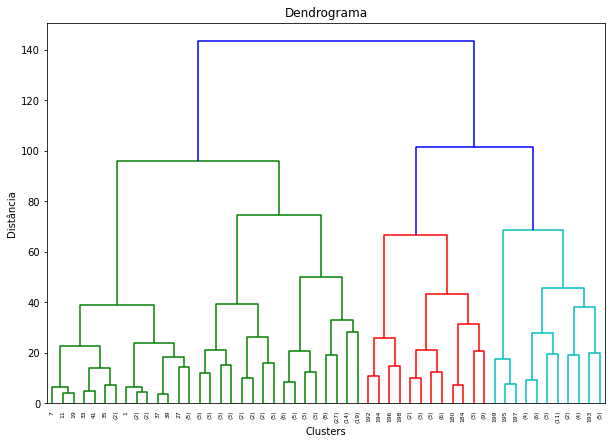

In [10]:
plt.figure(figsize=(10, 7))
plt.title('Dendrograma')
dendrogram(linkage(dados, 'complete'), truncate_mode = 'level', p = 5)
plt.ylabel('Distância')
plt.xlabel('Clusters')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering


modelo = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
clusters = modelo.fit_predict(dados)

dados_csv['Cluster'] = clusters
dados_csv

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


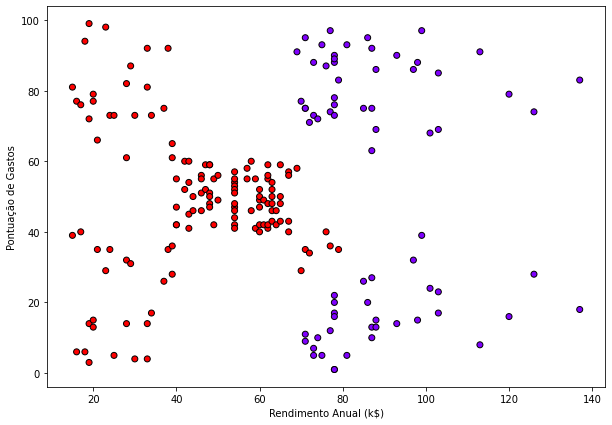

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(dados[:,0], dados[:,1], c=modelo.labels_, cmap='rainbow', edgecolors='black')

plt.ylabel('Pontuação de Gastos')
plt.xlabel('Rendimento Anual (k$)')

plt.show()

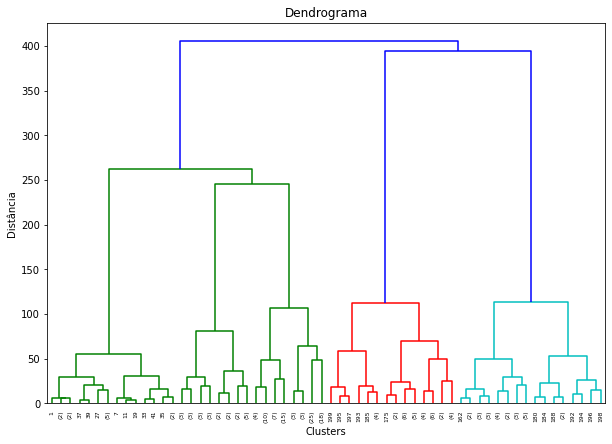

In [14]:
plt.figure(figsize=(10, 7))
plt.title('Dendrograma')
dendrogram(linkage(dados, 'ward'), truncate_mode='level', p = 5)
plt.ylabel('Distância')
plt.xlabel('Clusters')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering


modelo = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
clusters = modelo.fit_predict(dados)

dados_csv['Cluster'] = clusters
dados_csv

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


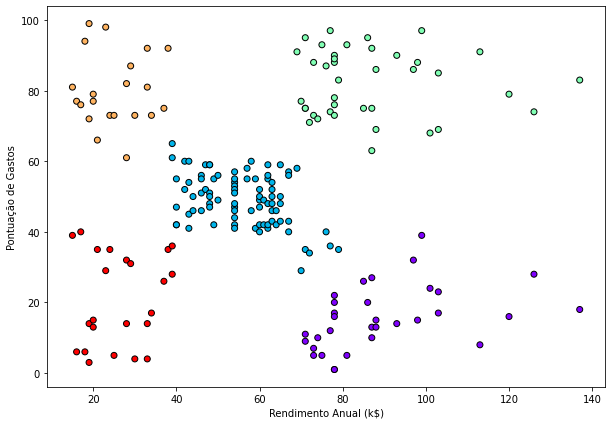

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(dados[:,0], dados[:,1], c=modelo.labels_, cmap='rainbow', edgecolors='black')

plt.ylabel('Pontuação de Gastos')
plt.xlabel('Rendimento Anual (k$)')

plt.show()